In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sherwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sherwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/sherwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sherwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/sherwin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sherwin/anaconda3/lib/py

# 获取数据

In [2]:
data = pd.read_csv("./data/nba_2017_nba_players_with_salary.csv")

In [3]:
data.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [4]:
data.shape

(342, 38)

In [5]:
data.describe()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,320.000000,342.000000,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,217.269006,26.444444,21.572515,3.483626,7.725439,0.446096,0.865789,2.440058,0.307016,2.620175,...,58.198830,21.572807,-0.676023,-0.005789,-0.681813,2.861725,9.186842,98.341053,28.950292,7.294006
std,136.403138,4.295686,8.804018,2.200872,4.646933,0.078992,0.780010,2.021716,0.134691,1.828714,...,22.282015,8.804121,2.063237,1.614293,2.522014,3.880914,3.585475,2.870091,14.603876,6.516326
min,1.000000,19.000000,2.200000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.200000,-4.430000,-3.920000,-6.600000,-2.320000,-1.600000,87.460000,0.000000,0.030000
25%,100.250000,23.000000,15.025000,1.800000,4.225000,0.402250,0.200000,0.800000,0.280250,1.200000,...,43.500000,15.025000,-2.147500,-1.222500,-2.422500,0.102500,7.100000,96.850000,19.000000,2.185000
50%,205.500000,26.000000,21.650000,3.000000,6.700000,0.442000,0.700000,2.200000,0.340500,2.200000,...,66.000000,21.650000,-0.990000,-0.130000,-1.170000,1.410000,8.700000,98.205000,29.000000,4.920000
75%,327.750000,29.000000,29.075000,4.700000,10.400000,0.481000,1.400000,3.600000,0.373500,3.700000,...,76.000000,29.075000,0.257500,1.067500,0.865000,4.487500,10.900000,100.060000,39.000000,11.110000
max,482.000000,40.000000,37.800000,10.300000,24.000000,0.750000,4.100000,10.000000,1.000000,9.700000,...,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000,23.000000,109.870000,66.000000,30.960000


# 数据分析

##  数据相关性

In [7]:
data_cor = data.loc[:, ['RPM', 'AGE', 'SALARY_MILLIONS', 'ORB', 'DRB', 'TRB',
                       'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS', 'GP', 'MPG', 'ORPM', 'DRPM']]

data_cor.head()

,RPM,AGE,SALARY_MILLIONS,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM
0,6.27,28,26.50,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,81,34.6,6.74,-0.47
1,4.81,27,26.50,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,81,36.4,6.38,-1.57
2,1.83,27,6.59,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9,76,33.8,5.72,-3.89
3,4.35,23,22.12,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,75,36.1,0.45,3.90
4,4.20,26,16.96,2.1,8.9,11.0,4.6,1.4,1.3,3.7,3.9,27.0,72,34.2,3.56,0.64


In [8]:
corr = data_cor.corr()

In [10]:
# 获取两列数据之间的相关性
corr.head()

,RPM,AGE,SALARY_MILLIONS,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM
RPM,1.000000,0.175820,0.477542,0.388764,0.623515,0.587853,0.481971,0.599008,0.463097,0.492014,0.434226,0.604432,0.340810,0.549449,0.769822,0.578388
AGE,0.175820,1.000000,0.353312,-0.015752,0.088859,0.062064,0.114908,0.069892,-0.062917,0.030673,0.005512,0.031422,0.051863,0.099657,0.136177,0.100636
SALARY_MILLIONS,0.477542,0.353312,1.000000,0.264954,0.531569,0.482088,0.486159,0.446763,0.260288,0.536993,0.341512,0.635425,0.348093,0.594162,0.503682,0.102307
ORB,0.388764,-0.015752,0.264954,1.000000,0.731345,0.861103,-0.011632,0.169075,0.654265,0.274670,0.557957,0.284908,0.296975,0.342140,0.102113,0.476857
DRB,0.623515,0.088859,0.531569,0.731345,1.000000,0.976244,0.350786,0.485726,0.660733,0.598043,0.670708,0.648267,0.473376,0.684662,0.428433,0.426536


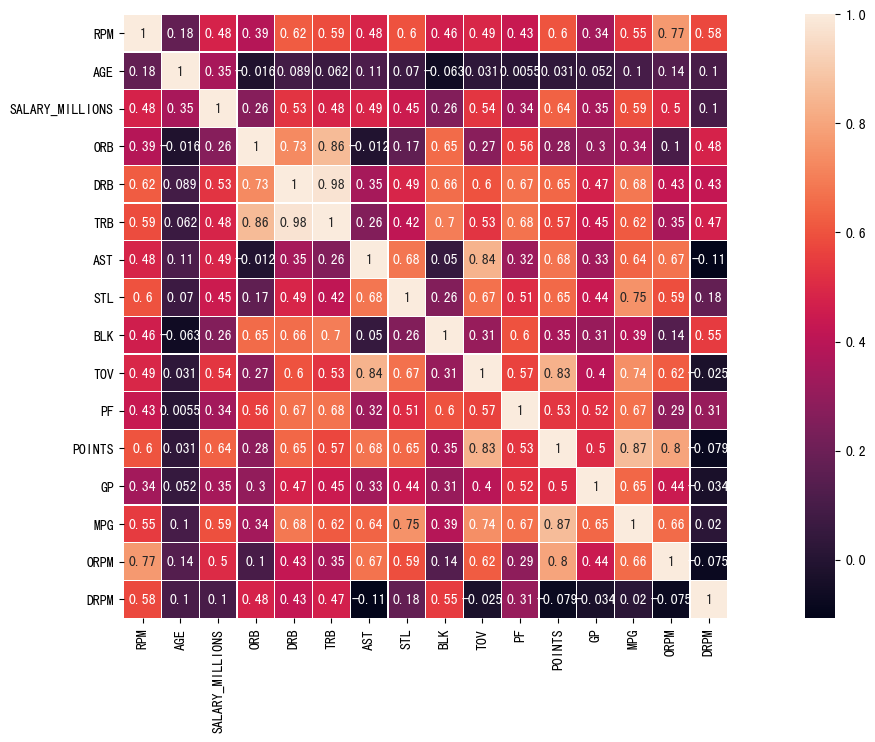

In [17]:
plt.figure(figsize=(20, 8), dpi=100)

sns.heatmap(corr, square=True, linewidths=0.1, annot=True)

## 基本数据排名分析

In [19]:
# 按照效率值排名

data.loc[:, ["PLAYER", "RPM", "AGE"]].sort_values(by="RPM", ascending=False).head()

,PLAYER,RPM,AGE
6,LeBron James,8.42,32
37,Chris Paul,7.92,31
8,Stephen Curry,7.41,28
120,Draymond Green,7.14,26
7,Kawhi Leonard,7.08,25


In [22]:
# 按照球员薪资排名

data.loc[:, ["PLAYER", "RPM", "AGE", "SALARY_MILLIONS"]].sort_values(by="SALARY_MILLIONS", ascending=False).head()

,PLAYER,RPM,AGE,SALARY_MILLIONS
6,LeBron James,8.42,32,30.96
25,Mike Conley,4.47,29,26.54
67,Al Horford,1.82,30,26.54
0,Russell Westbrook,6.27,28,26.50
1,James Harden,4.81,27,26.50


## Seaborn常用的三个数据可视化方法

### 单变量：

/Users/sherwin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sherwin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sherwin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sherwin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarn

Text(0,0.5,'AGE')

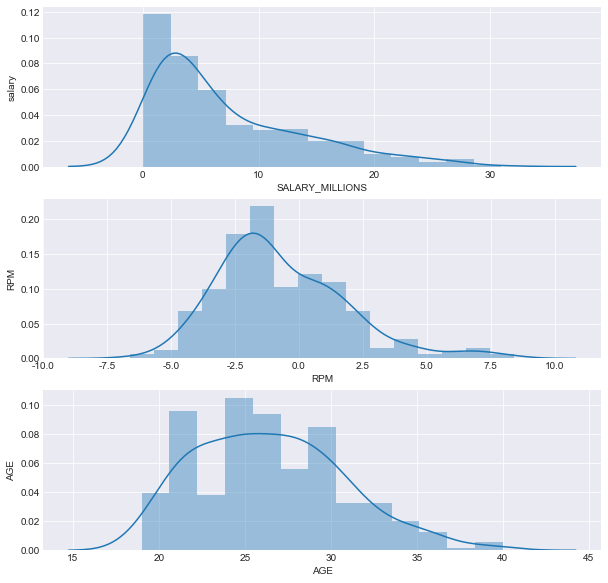

In [24]:
# 利用seaborn中的distplot绘图来分别看一下球员薪水、效率值、年龄这三个信息的分布情况

sns.set_style("darkgrid")

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
sns.distplot(data["SALARY_MILLIONS"])
plt.ylabel("salary")

plt.subplot(3, 1, 2)
sns.distplot(data["RPM"])
plt.ylabel("RPM")

plt.subplot(3, 1, 3)
sns.distplot(data["AGE"])
plt.ylabel("AGE")

###  双变量

/Users/sherwin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sherwin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sherwin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


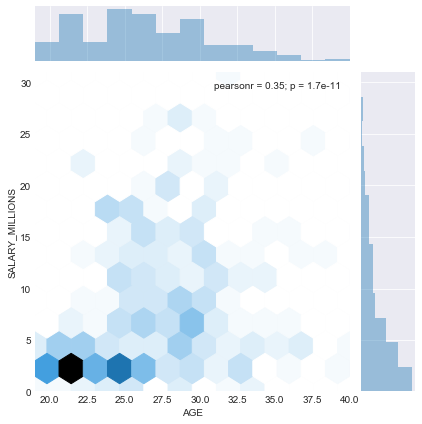

In [26]:
sns.jointplot(data.AGE, data.SALARY_MILLIONS, kind="hex")

### 多变量

In [27]:
multi_data = data.loc[:, ['RPM','SALARY_MILLIONS','AGE','POINTS']]
multi_data.head()

,RPM,SALARY_MILLIONS,AGE,POINTS
0,6.27,26.50,28,31.6
1,4.81,26.50,27,29.1
2,1.83,6.59,27,28.9
3,4.35,22.12,23,28.0
4,4.20,16.96,26,27.0


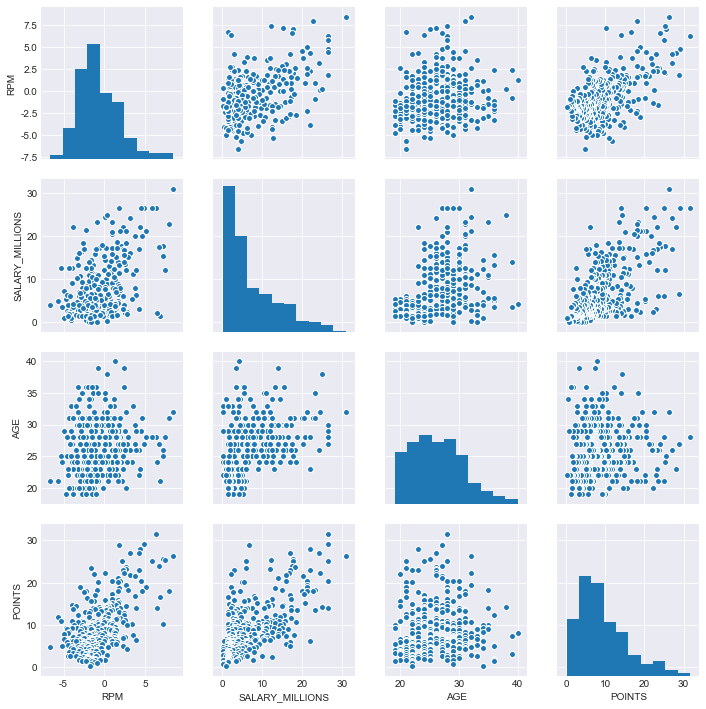

In [28]:
sns.pairplot(multi_data)

## 衍生变量的一些可视化实践-以年龄为例

In [29]:
def age_cut(df):
    """年龄划分"""
    if df.AGE <= 24:
        return "young"
    elif df.AGE >= 30:
        return "old"
    else:
        return "best"

In [30]:
# 使用apply对年龄进行划分
data["age_cut"] = data.apply(lambda x:age_cut(x), axis=1)

In [31]:
data.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,age_cut
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,best
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,best
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59,best
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12,young
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,best


In [33]:
# 方便计数
data["cut"] = 1

In [36]:
data.loc[data.age_cut == "best"].SALARY_MILLIONS.head()

0    26.50
1    26.50
2     6.59
4    16.96
5    24.33
Name: SALARY_MILLIONS, dtype: float64

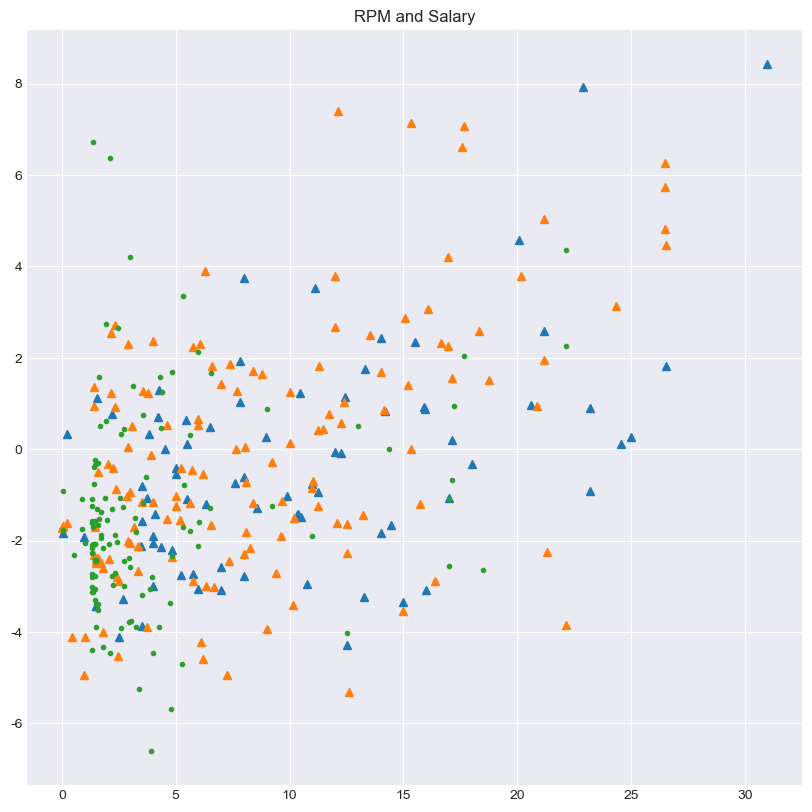

In [39]:
# 基于年龄段对球员薪水和效率值进行分析
sns.set_style("darkgrid")
plt.figure(figsize=(10,10), dpi=100)
plt.title("RPM and Salary")

x1 = data.loc[data.age_cut == "old"].SALARY_MILLIONS
y1 = data.loc[data.age_cut == "old"].RPM
plt.plot(x1, y1, "^")

x2 = data.loc[data.age_cut == "best"].SALARY_MILLIONS
y2 = data.loc[data.age_cut == "best"].RPM
plt.plot(x2, y2, "^")

x3 = data.loc[data.age_cut == "young"].SALARY_MILLIONS
y3 = data.loc[data.age_cut == "young"].RPM
plt.plot(x3, y3, ".")

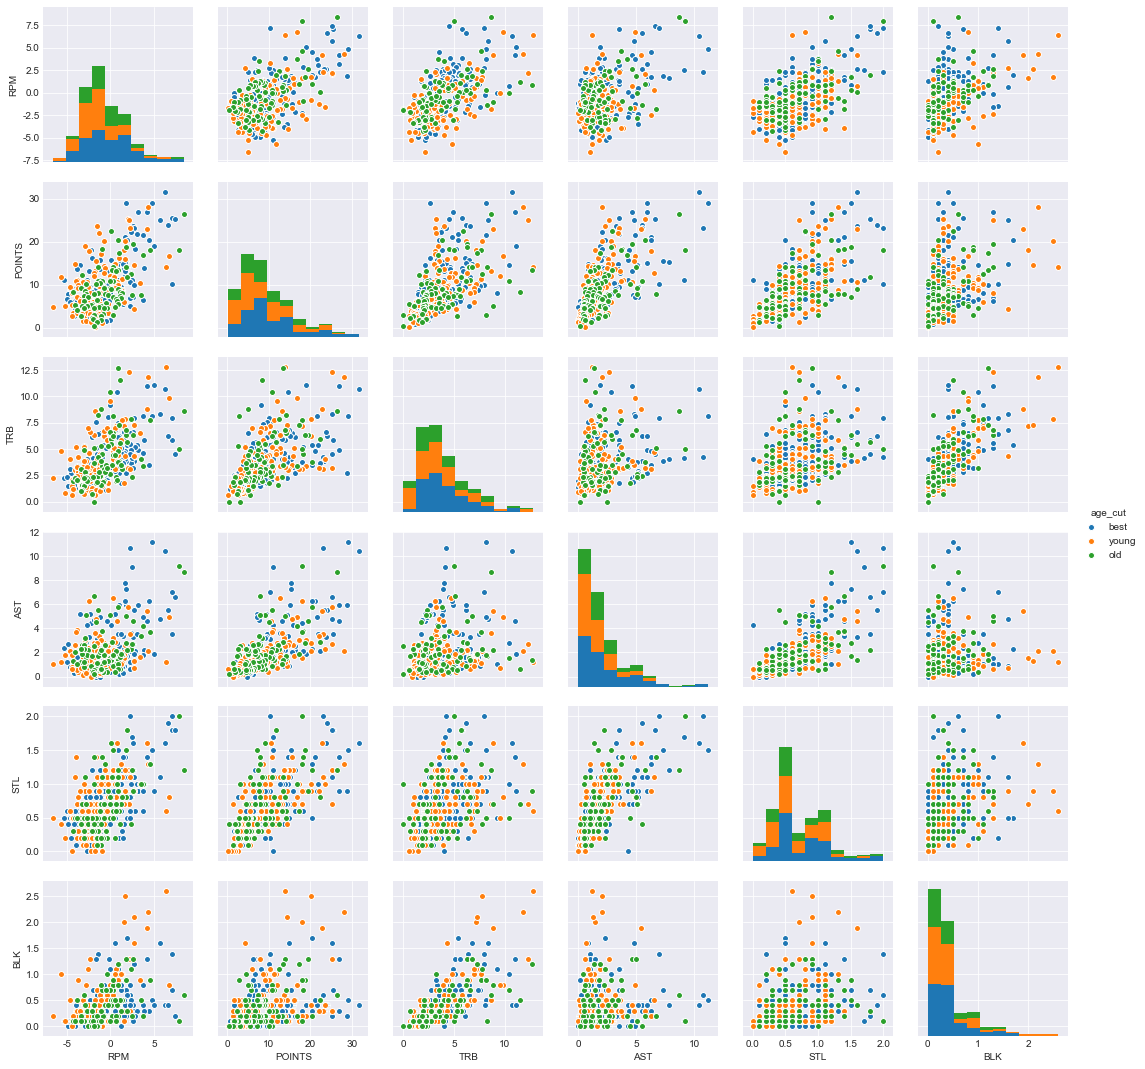

In [41]:
multi_data2 = data.loc[:, ['RPM','POINTS','TRB','AST','STL','BLK','age_cut']]

sns.pairplot(multi_data2, hue="age_cut")

# 球队数据分析

## 球队薪资排行

In [43]:
data.groupby(by="age_cut").agg({"SALARY_MILLIONS":np.max})

,SALARY_MILLIONS
age_cut,
best,26.54
old,30.96
young,22.12


In [47]:
data_team = data.groupby(by="TEAM").agg({"SALARY_MILLIONS":np.mean})

data_team.sort_values(by="SALARY_MILLIONS", ascending=False).head(10)

,SALARY_MILLIONS
TEAM,
CLE,17.095000
HOU,13.432000
GS,12.701429
ORL/TOR,11.125000
POR,9.730000
WSH,9.628889
ORL,9.490000
MIL/CHA,9.425000
SA,9.347273


In [49]:
# 按照分球队分年龄段，上榜球员降序排列，如上榜球员数相同，则按效率值降序排列。
data_rpm = data.groupby(by=["TEAM", "age_cut"]).agg({"SALARY_MILLIONS":np.mean, 
                                                           "RPM":np.mean, "PLAYER":np.size})

In [51]:
data_rpm.head()

SALARY_MILLIONS       RPM  PLAYER
TEAM        age_cut                                   
ATL         best            4.678000 -1.768000       5
            old            12.775000  0.982500       4
            young           1.926667 -3.076667       3
ATL/CLE     old             5.040000 -2.485000       2
ATL/PHI/OKC best            8.400000  1.720000       1

In [55]:
data_rpm.sort_values(by=["PLAYER", "RPM"], ascending=False).head()

,,SALARY_MILLIONS,RPM,PLAYER
TEAM,age_cut,,,
CHA,young,3.835000,-0.362500,8
BOS,best,7.034286,0.647143,7
TOR,young,4.158571,-0.555714,7
BOS,young,2.337143,-1.821429,7
MIN,best,5.560000,0.828333,6


## 按照球队综合实力排名

In [56]:
data_rpm2 = data.groupby(by=['TEAM'], as_index=False).agg({'SALARY_MILLIONS': np.mean,
                                                          'RPM': np.mean,
                                                          'PLAYER': np.size,
                                                          'POINTS': np.mean,
                                                          'eFG%': np.mean,
                                                          'MPG': np.mean,
                                                          'AGE': np.mean})

In [58]:
data_rpm2.head()

,TEAM,SALARY_MILLIONS,RPM,PLAYER,POINTS,eFG%,MPG,AGE
0,ATL,6.689167,-1.178333,12,7.416667,0.442667,18.541667,27.000000
1,ATL/CLE,5.040000,-2.485000,2,7.650000,0.582000,21.050000,35.500000
2,ATL/PHI/OKC,8.400000,1.720000,1,13.100000,0.511000,26.100000,29.000000
3,BKN,5.704545,-1.224545,11,9.045455,0.487273,20.227273,27.636364
4,BKN/WSH,4.910000,-4.045000,2,8.150000,0.470000,17.350000,27.000000


In [60]:
data_rpm2.sort_values(by="RPM", ascending=False).head()

,TEAM,SALARY_MILLIONS,RPM,PLAYER,POINTS,eFG%,MPG,AGE
18,GS,12.701429,3.478571,7,14.528571,0.575143,26.700000,28.714286
9,CLE,17.095000,2.566667,6,15.883333,0.555833,29.766667,28.000000
2,ATL/PHI/OKC,8.400000,1.720000,1,13.100000,0.511000,26.100000,29.000000
20,HOU,13.432000,1.582000,5,15.420000,0.534600,29.980000,27.200000
44,SA,9.347273,0.901818,11,9.818182,0.524182,21.472727,29.545455


## 利用箱线图和小提琴图进行数据分析

In [64]:
data.TEAM.isin(['GS', 'CLE', 'SA', 'LAC', 'OKC', 'UTAH', 'CHA', 'TOR', 'NO', 'BOS']).head()

0     True
1    False
2     True
3     True
4    False
Name: TEAM, dtype: bool

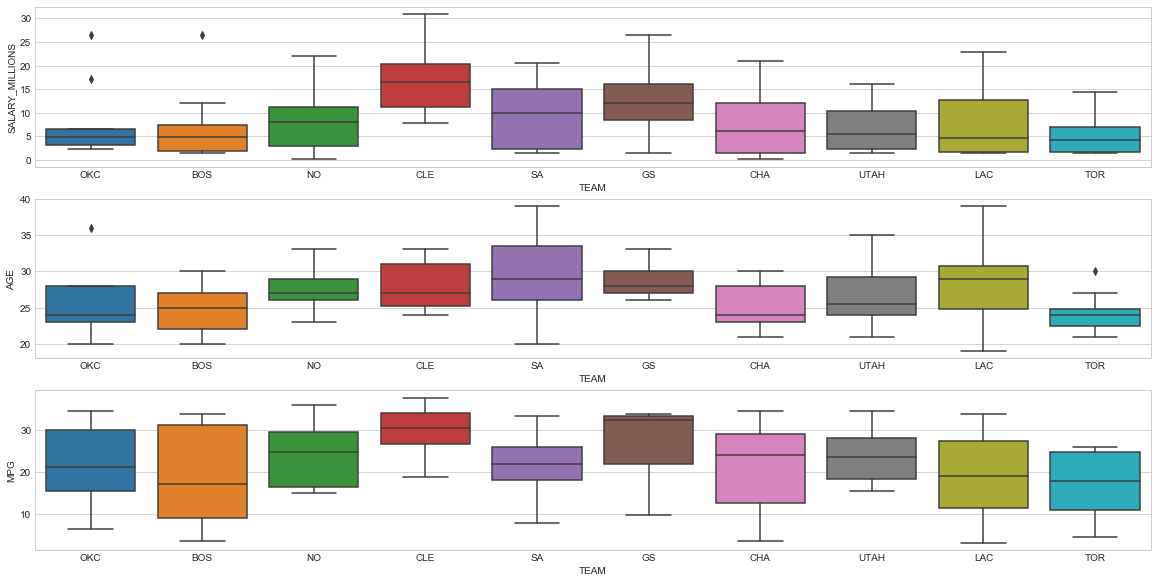

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
# 获取需要的数据
data_team2 = data[data.TEAM.isin(['GS', 'CLE', 'SA', 'LAC', 'OKC', 'UTAH', 'CHA', 'TOR', 'NO', 'BOS'])]

# 进行相应的绘图
plt.subplot(3,1,1)
sns.boxplot(x="TEAM", y="SALARY_MILLIONS", data = data_team2)

plt.subplot(3,1,2)
sns.boxplot(x="TEAM", y="AGE", data = data_team2)

plt.subplot(3,1,3)
sns.boxplot(x="TEAM", y="MPG", data = data_team2)

In [70]:
data.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,age_cut,cut
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,best,1
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,best,1
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59,best,1
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12,young,1
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,best,1


/Users/sherwin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


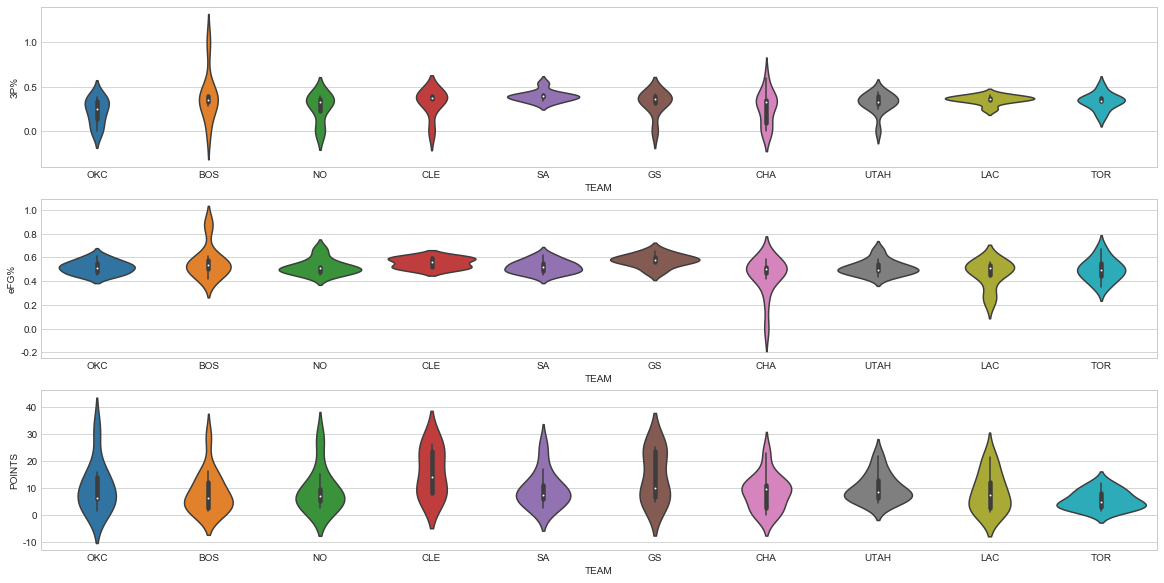

In [71]:
# 绘制小提琴图
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
sns.violinplot(x="TEAM", y="3P%", data=data_team2)

plt.subplot(3,1,2)
sns.violinplot(x="TEAM", y="eFG%", data=data_team2)

plt.subplot(3,1,3)
sns.violinplot(x="TEAM", y="POINTS", data=data_team2)